In [42]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler,PolynomialFeatures #Z-score variables, Polynomial
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
%matplotlib inline

# Review

## Feature Engineering

In order to make better models, sometimes we create new features in our data. This can be as simple as creating a column like `BMI` or `bill_ratio` like we've done in past classworks, or extracting the day of the week from a date string, but it can also be things like creating **polynomial features**, **step functions**, **splines**, or **interactions** like we discussed in the lecture.

These features can help our model perform better. For  **polynomial features**, **step functions**, and **splines**, it also allows us to add non-linearity to our predictions even though we're using *linear* regression.


- <img src="https://drive.google.com/uc?export=view&id=1o6mI_7aY5A-xTwerptd3v9_GkNs9kG3L" alt="Q" width = "400"/>


- <img src="https://drive.google.com/uc?export=view&id=1pSDedwmNzfsezIOVKj36Fp4KtmCsNOTR" alt="Q" width = "400"/>


- <img src="https://drive.google.com/uc?export=view&id=1KxmPMBZ5ZlyB8WsEPicUKGIIU17oxSBA" alt="Q" width = "400"/>






# `sklearn`
Let's build a polynomial regression in sklearn. First, let's look at what `PolynomialFeatures()` is doing under the hood.

In [43]:
np.random.seed(8675309)

x = pd.DataFrame({"x" : np.random.normal(size = 100),
                  "y" : np.random.normal(size = 100),
                  "z" : np.random.normal(size = 100)
                  })

x.head()

,x,y,z
0,0.589024,0.144687,-2.560439
1,0.733119,-0.846574,0.961272
2,-1.162189,-1.120992,0.743904
3,-0.556816,-0.388865,-0.470965
4,-0.772488,-0.335495,-1.003179


In [44]:
p = PolynomialFeatures(degree = 3, include_bias= False)

x_new = pd.DataFrame(p.fit_transform(x))
x_new.columns = p.get_feature_names_out(x.columns)
x_new.head()
x_new

,x,y,z,x^2,x y,x z,y^2,y z,z^2,x^3,x^2 y,x^2 z,x y^2,x y z,x z^2,y^3,y^2 z,y z^2,z^3
0,0.589024,0.144687,-2.560439,0.346949,0.085224,-1.508159,0.020934,-0.370463,6.555850,2.043611e-01,0.050199,-0.888342,0.012331,-0.218211,3.861551,0.003029,-0.053601,0.948548,-16.785858
1,0.733119,-0.846574,0.961272,0.537463,-0.620639,0.704726,0.716688,-0.813788,0.924044,3.940240e-01,-0.455002,0.516648,0.525417,-0.596603,0.677434,-0.606730,0.688932,-0.782272,0.888257
2,-1.162189,-1.120992,0.743904,1.350683,1.302804,-0.864556,1.256622,-0.833910,0.553393,-1.569748e+00,-1.514104,1.004778,-1.460432,0.969161,-0.643147,-1.408663,0.934806,-0.620349,0.411671
3,-0.556816,-0.388865,-0.470965,0.310044,0.216526,0.262241,0.151216,0.183142,0.221808,-1.726375e-01,-0.120565,-0.146020,-0.084199,-0.101976,-0.123506,-0.058803,-0.071217,-0.086253,-0.104464
4,-0.772488,-0.335495,-1.003179,0.596738,0.259166,0.774944,0.112557,0.336561,1.006369,-4.609735e-01,-0.200203,-0.598636,-0.086949,-0.259990,-0.777408,-0.037762,-0.112915,-0.337631,-1.009569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.966084,-0.309036,-0.060047,0.933318,-0.298555,-0.058010,0.095503,0.018557,0.003606,9.016633e-01,-0.288429,-0.056043,0.092264,0.017927,0.003483,-0.029514,-0.005735,-0.001114,-0.000217
96,-1.614034,0.505756,0.467089,2.605107,-0.816308,-0.753897,0.255789,0.236233,0.218172,-4.204732e+00,1.317549,1.216816,-0.412853,-0.381288,-0.352137,0.129367,0.119476,0.110342,0.101906
97,-1.340734,0.346501,-0.073824,1.797569,-0.464566,0.098978,0.120063,-0.025580,0.005450,-2.410062e+00,0.622860,-0.132703,-0.160973,0.034296,-0.007307,0.041602,-0.008864,0.001888,-0.000402
98,-0.005767,0.613008,-1.253319,0.000033,-0.003535,0.007228,0.375779,-0.768295,1.570808,-1.918181e-07,0.000020,-0.000042,-0.002167,0.004431,-0.009059,0.230356,-0.470971,0.962919,-1.968724


We can see that it's creating columns for each of our originals (`x`, `y`, and `z`) up to the power of `degree`. It's also adding up to `degree`-way interactions (e.g. 3-way here).

BTW, if we only want the interactions, not the polynomial features, we can add the argument `interaction_only = True`

## Amazon Price Polynomial Prediction

Now that we understand what's going on under the hood, let's build a model. We'll start with the code from last time where we were predicting Amazon Price.

In [45]:
# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# Z_score
z = make_column_transformer((StandardScaler(), predictors),
                           remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
               ("poly", PolynomialFeatures(degree = 2)),
                ("linearregression", lr)])

# fit
pipe.fit(X,y)

# predict
y_pred = pipe.predict(X)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

MSE :  4.7599549108101025
MAE :  1.6018526451401511
MAPE:  0.16003953164550364
R2  :  0.9643815886893414


## Chicken Fingers Polynomial Prediction

In [46]:
# Load Data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/07_cw.csv")

# drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

# set up X and y
predictors = ["ChickenFingers"]

X = df[predictors]
y = df["Happiness"]


# z score
pre = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("pre", pre),
                ("linearregression", lr)])

# fit
pipe.fit(X,y)

# predict
y_pred = pipe.predict(X)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

MSE :  0.9696069666281866
MAE :  0.8323583420780534
MAPE:  1.2220001520622485
R2  :  0.020599023607891898


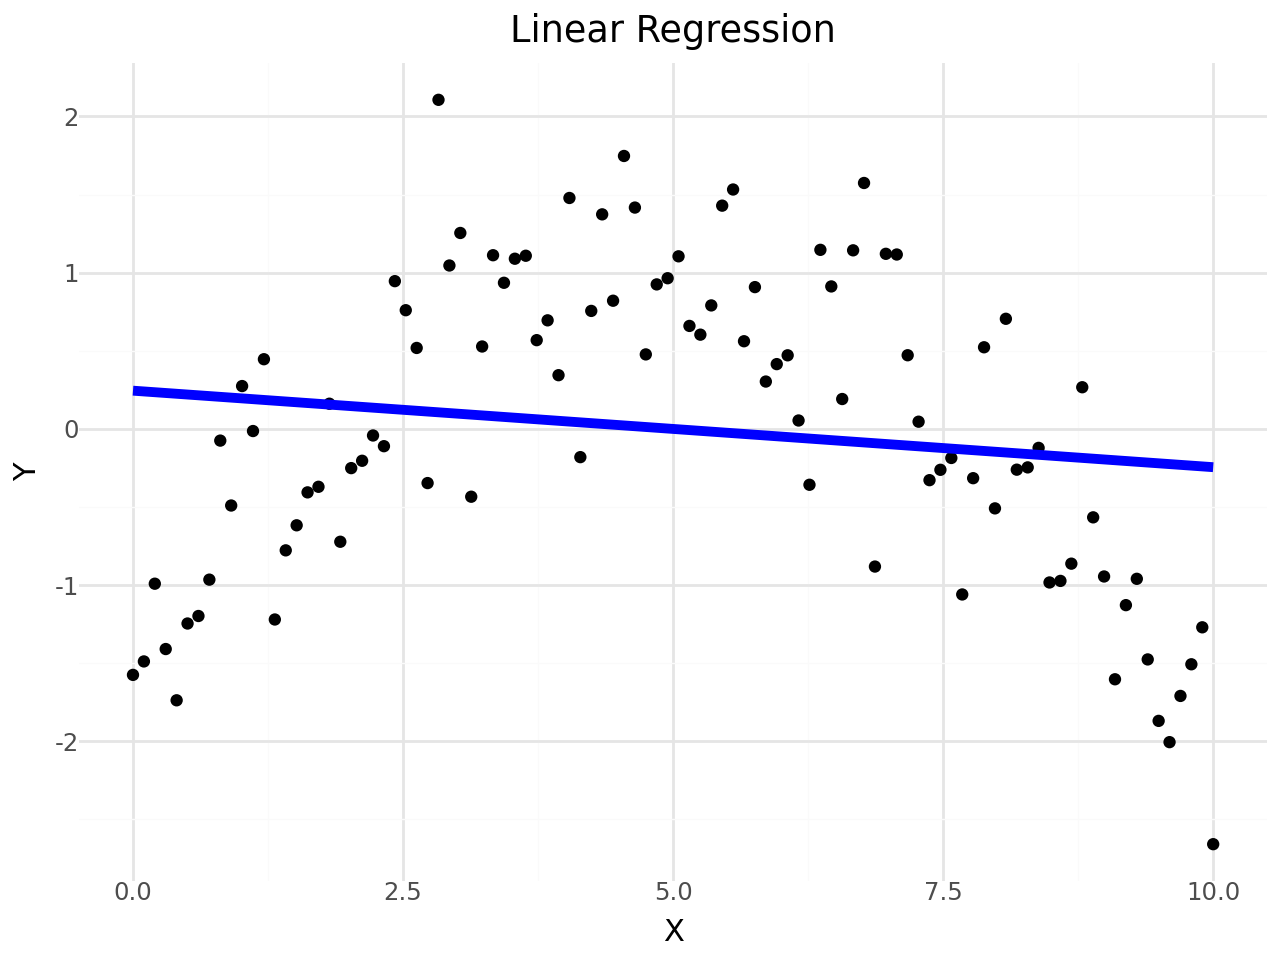

In [47]:
(ggplot(df, aes(x = "ChickenFingers", y = "Happiness")) + geom_point() +
 labs(x = "X", y = "Y", title = "Linear Regression") +
  geom_smooth(method = "lm", se = False, color = "blue", size = 2) +
  theme_minimal())

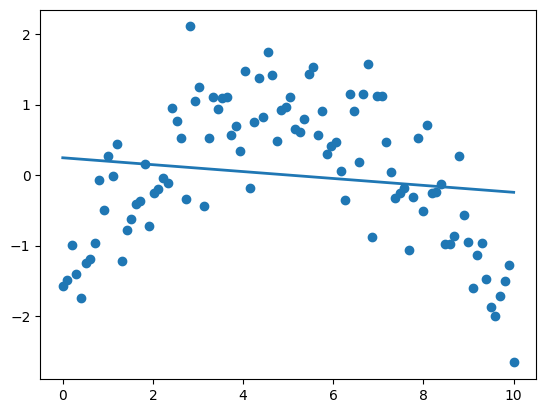

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df["ChickenFingers"], df["Happiness"])
plt.plot(df["ChickenFingers"],y_pred,linewidth=2.0)
plt.show()

In [49]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/07_cw.csv")

# drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

# set up X and y
predictors = ["ChickenFingers"]

X = df[predictors]
y = df["Happiness"]

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 2)),
                ("linearregression", lr)])

# fit
pipe.fit(X,y)

# predict
y_pred = pipe.predict(X)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))


MSE :  0.290353290841735
MAE :  0.4376747935901826
MAPE:  1.4694196119308012
R2  :  0.706713847634611


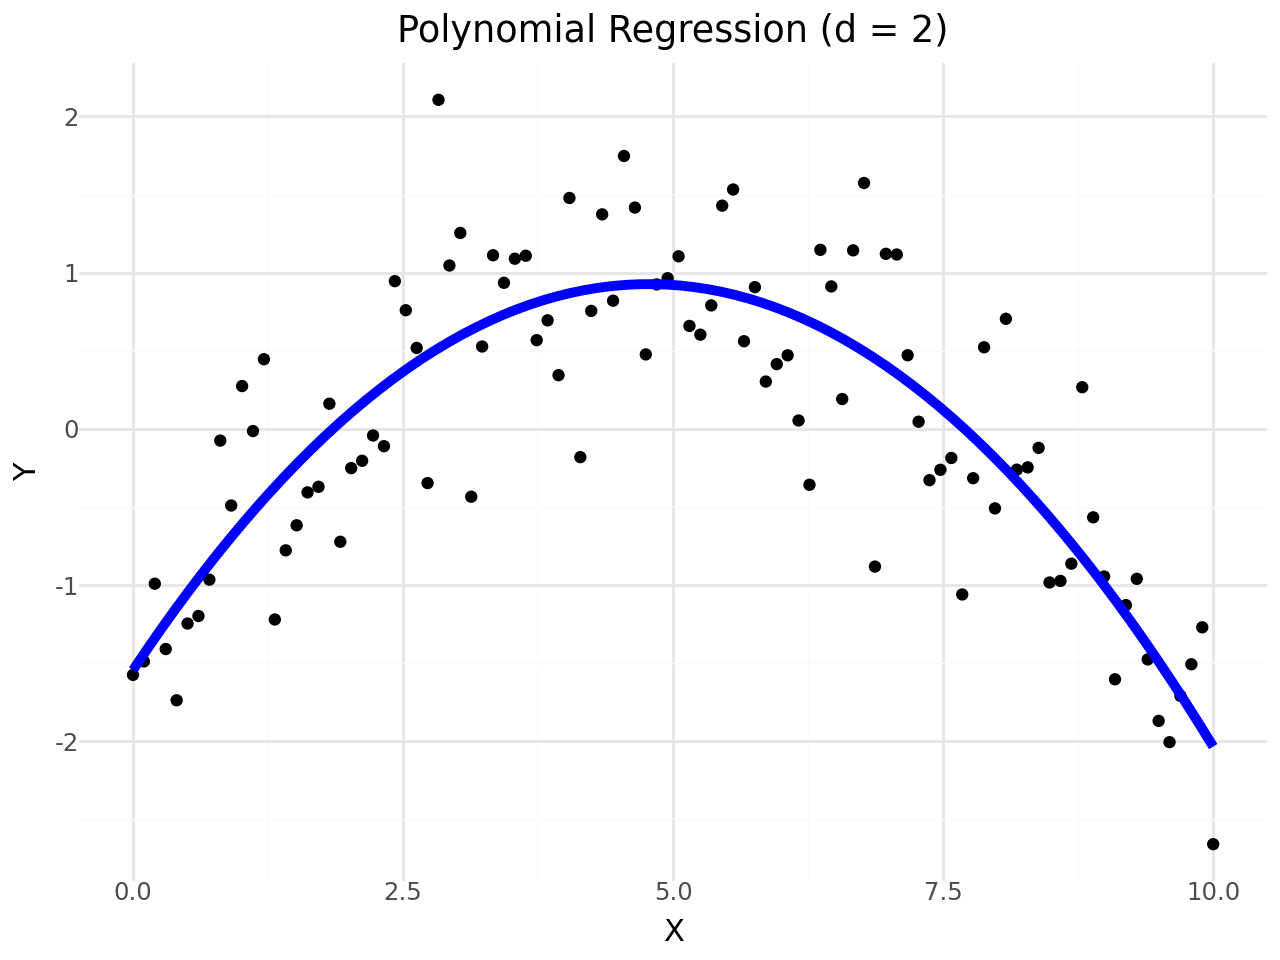

In [50]:
def poly(x, degree=1):
    """
    from: https://stackoverflow.com/questions/63344621/fit-non-linear-curve-using-plotnine
    Fit Polynomial

    These are non orthogonal factors, but it may not matter if
    we only need this for smoothing and not extrapolated
    predictions.
    """
    d = {}
    for i in range(degree+1):
        if i == 1:
            d['x'] = x
        else:
            d[f'x**{i}'] = np.power(x, i)
    return pd.DataFrame(d)

(ggplot(df, aes(x = "ChickenFingers", y = "Happiness")) + geom_point() +
 labs(x = "X", y = "Y", title = "Polynomial Regression (d = 2)") +
  geom_smooth(method = "lm", se = False, formula = 'y ~ poly(x, degree=2)', color = "blue", size = 2) +
  theme_minimal())

Let's copy this code and make a Polynomial with `degree = 25` and see what happens.

In [51]:
#Your code here


Now that you know the power of Polynomial Regression, let's practice building some Polynomial Regression Models!

In [52]:
#### Let's use mtcars data
from plotnine.data import mtcars

In [53]:
mtcars.head(5)
#mtcars comprises 11 features of 32 automobiles from the 1974 Motor Trend US magazine.
# mpg Miles/(US) gallon
# cyl Number of cylinders
# disp Displacement (cu.in.)
# hp Gross horsepower
# drat Rear axle ratio
# wt Weight (1000 lbs)
# qsec 1/4 mile time
# vs Engine (0 = V-shaped, 1 = straight)
# am Transmission (0 = automatic, 1 = manual)
# gear Number of forward gears

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predicted_mpg
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,22.493696
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,20.177207
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,25.218976
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,19.244363
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.392533


In [54]:
#Plot the wt (x-axis) and mpg (y-axis) using plotnine/ggplot

In [55]:
#Fit a LinearRegression() model to predict mpg based on wt, and print out the MSE, MAE, R2, and MAPE

# predict

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))


MSE :  0.290353290841735
MAE :  0.4376747935901826
MAPE:  1.4694196119308012
R2  :  0.706713847634611


In [56]:
#Plot the wt (x-axis) and mpg (y-axis) using am as a factor


In [57]:
#Now consider two features: wt and am,
#Fit a LinearRegression() model with PolynomialFeatures(),
#only consider interactions, and print out the MSE, MAE, R2, and MAPE


In [58]:
X = mtcars[["wt","am"]]
y = mtcars["mpg"]
poly = PolynomialFeatures(interaction_only=True,include_bias= False)
x_new = pd.DataFrame(poly.fit_transform(X))
x_new.columns = poly.get_feature_names_out(X.columns)
x_new.head()

,wt,am,wt am
0,2.620,1.0,2.620
1,2.875,1.0,2.875
2,2.320,1.0,2.320
3,3.215,0.0,0.000
4,3.440,0.0,0.000


In [59]:
lr = LinearRegression()
lr.fit(x_new, y)
y_pred = lr.predict(x_new)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

MSE :  5.875239558304704
MAE :  1.9115290769873354
MAPE:  0.0984085903532296
R2  :  0.8330374890566026


Compare the model without feature "am", what do you see based on the assessment?

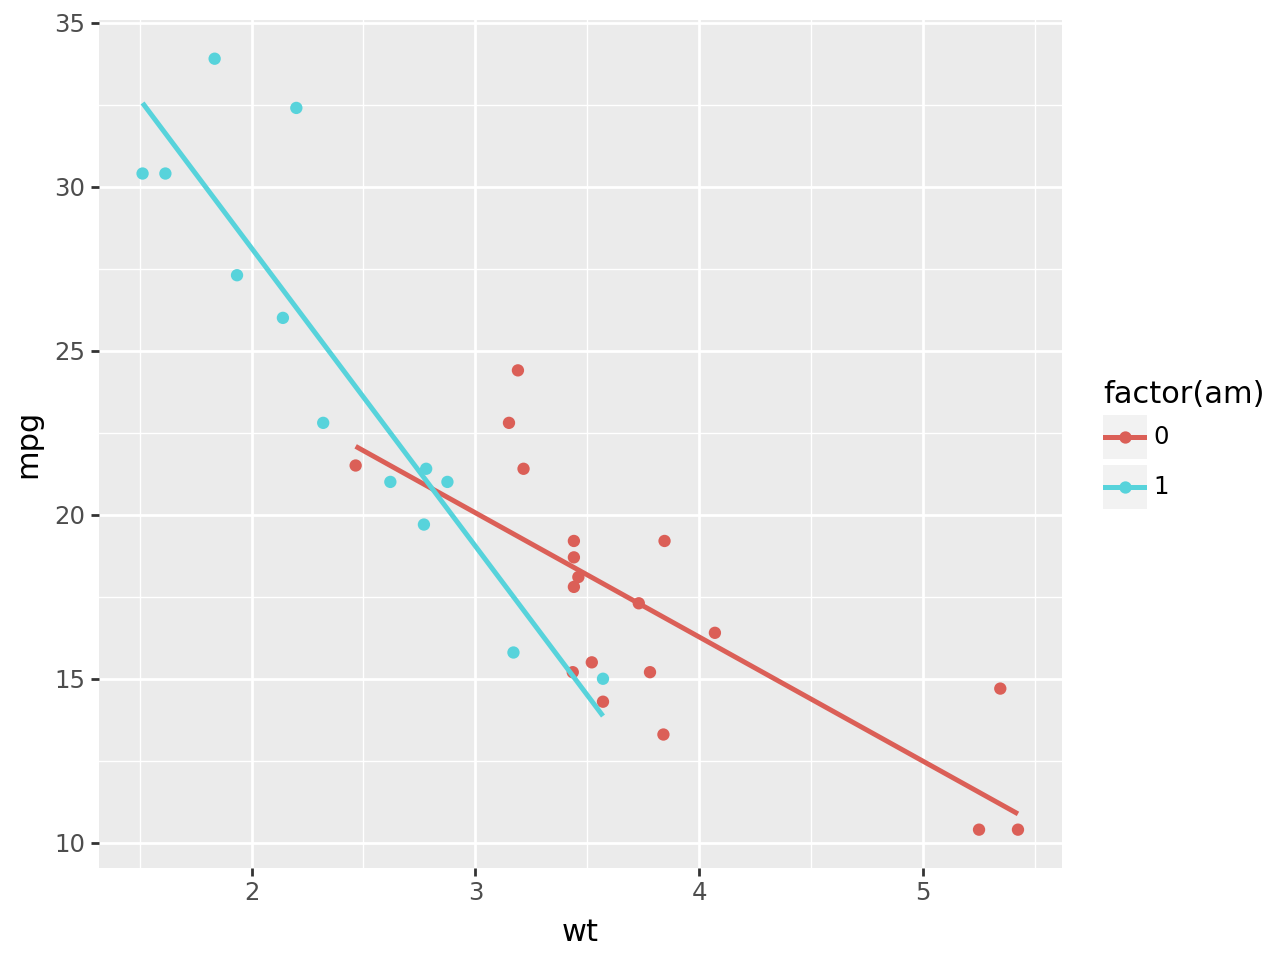

In [60]:
### plot the fitted line
mtcars['predicted_mpg']=lr.predict(x_new)
(ggplot(mtcars, aes(x = "wt", y = "mpg",color="factor(am)")) + geom_point()+geom_line(aes(y = "predicted_mpg"), size = 1))

# Task
To implement polynomial regression with degree 25 for 'ChickenFingers' and 'Happiness', I will copy the existing polynomial regression code from cell `xXN5Q8YM67SV` to cell `ZmJWTOtG67SW` and modify `PolynomialFeatures(degree=2)` to `PolynomialFeatures(degree=25)`. Then, I will fit the model and print the assessment metrics (MSE, MAE, MAPE, R2).
```python
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/07_cw.csv")

# drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

# set up X and y
predictors = ["ChickenFingers"]

X = df[predictors]
y = df["Happiness"]

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 25)),
                ("linearregression", lr)])

# fit
pipe.fit(X,y)

# predict
y_pred = pipe.predict(X)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))
```

## Polynomial Regression (Degree 25)

### Subtask:
Copy the polynomial regression code for 'ChickenFingers' and 'Happiness' to cell `ZmJWTOtG67SW` and modify it to use a PolynomialFeatures degree of 25. Then, fit the model and print the assessment metrics (MSE, MAE, MAPE, R2).


**Reasoning**:
The subtask requires copying and modifying existing code to fit a polynomial regression model with a degree of 25. I will provide the modified code block to be inserted into the specified cell.



In [61]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/07_cw.csv")

# drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

# set up X and y
predictors = ["ChickenFingers"]

X = df[predictors]
y = df["Happiness"]

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("poly", PolynomialFeatures(degree = 25)),
                ("linearregression", lr)])

# fit
pipe.fit(X,y)

# predict
y_pred = pipe.predict(X)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

MSE :  0.21862196456677263
MAE :  0.3456154877266851
MAPE:  0.8016248054276506
R2  :  0.7791697327608356


## Plot mtcars wt vs mpg

### Subtask:
Generate a plotnine/ggplot scatter plot of `wt` (x-axis) against `mpg` (y-axis) from the `mtcars` dataset.


**Reasoning**:
To generate the requested plotnine/ggplot scatter plot, I will create a code block that initializes a ggplot object with the `mtcars` data, maps `wt` to the x-axis and `mpg` to the y-axis, adds `geom_point()` for the scatter plot, sets appropriate axis labels and a title, and applies a minimal theme.



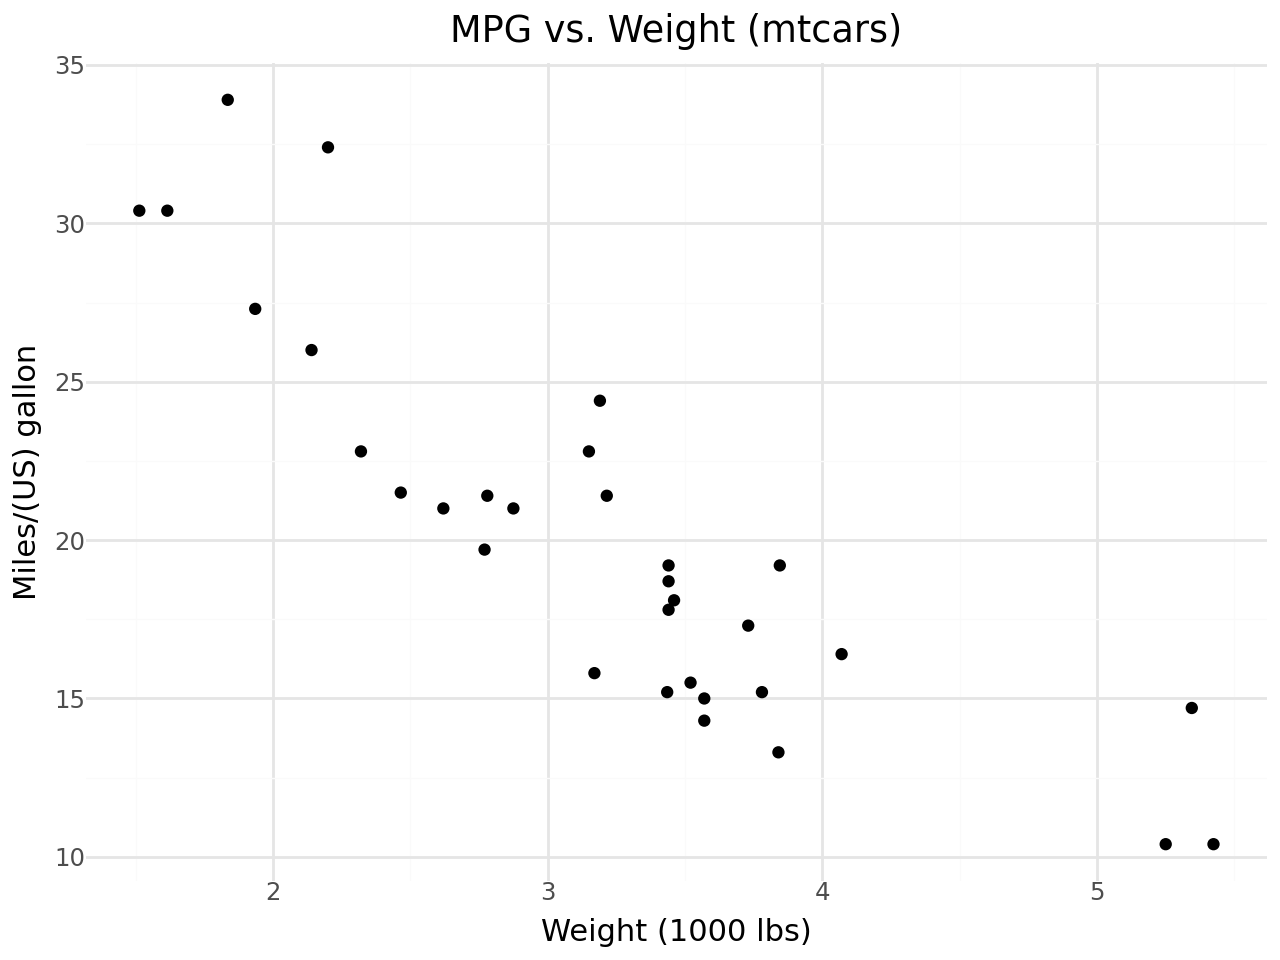

In [62]:
(
    ggplot(mtcars, aes(x="wt", y="mpg"))
    + geom_point()
    + labs(
        x="Weight (1000 lbs)",
        y="Miles/(US) gallon",
        title="MPG vs. Weight (mtcars)"
    )
    + theme_minimal()
)

## Fit Linear Regression for mtcars (wt vs mpg)

### Subtask:
Set up `X` as `mtcars[['wt']]` and `y` as `mtcars['mpg']`. Fit a `LinearRegression()` model to predict `mpg` based on `wt` and print out the MSE, MAE, R2, and MAPE.


**Reasoning**:
To perform linear regression, I need to define the predictor (X) and target (y) variables, then fit a `LinearRegression` model, make predictions, and finally calculate and print the required evaluation metrics (MSE, MAE, MAPE, R2).



In [63]:
# set up X and y
X = mtcars[['wt']]
y = mtcars['mpg']

lr = LinearRegression()

# fit
lr.fit(X,y)

# predict
y_pred = lr.predict(X)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

MSE :  8.697560548229477
MAE :  2.340641858325169
MAPE:  0.1260733272106319
R2  :  0.7528327936582646


## Plot mtcars wt vs mpg by am factor

### Subtask:
Generate a plotnine/ggplot scatter plot of `wt` (x-axis) against `mpg` (y-axis) from the `mtcars` dataset, using `am` as a color factor. Ensure appropriate labels and title.


**Reasoning**:
To generate the requested plotnine/ggplot scatter plot, I will create a code block that initializes a ggplot object with the mtcars data, maps `wt` to the x-axis, `mpg` to the y-axis, and `factor(am)` to the color aesthetic, adds `geom_point()`, sets appropriate axis labels and a title, and applies a minimal theme.



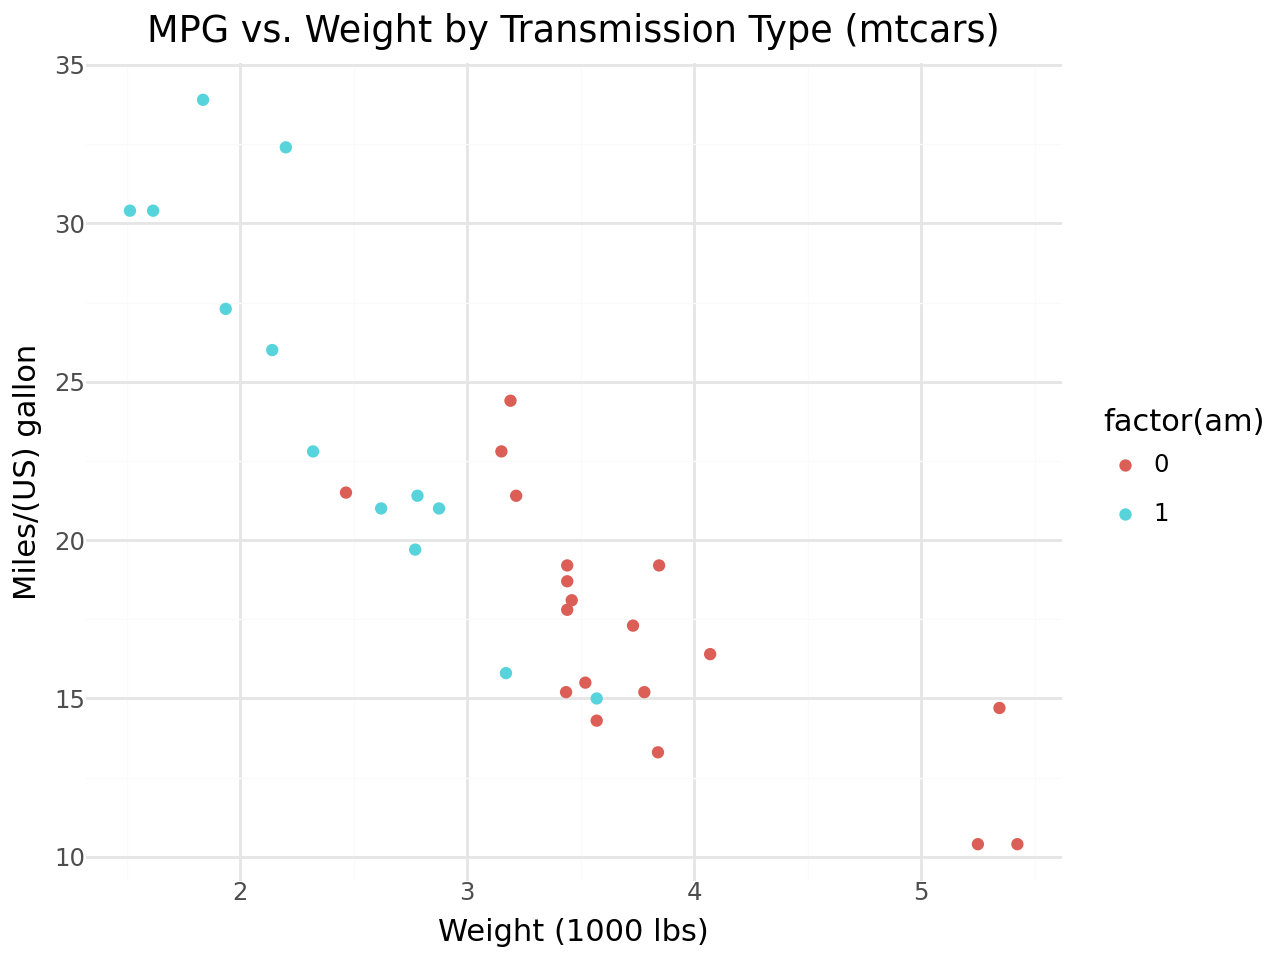

In [64]:
(
    ggplot(mtcars, aes(x="wt", y="mpg", color="factor(am)"))
    + geom_point()
    + labs(
        x="Weight (1000 lbs)",
        y="Miles/(US) gallon",
        title="MPG vs. Weight by Transmission Type (mtcars)"
    )
    + theme_minimal()
)

## Compare Models

### Subtask:
Provide a comparison of the model with `wt` and `am` (including interactions) to the linear regression model with only `wt`, based on their assessment metrics (MSE, MAE, R2, MAPE).


## Compare Models

### Comparison of Model Performance:

**Model 1: Linear Regression with 'wt' only (from cell `2ab6bad3`)**
- **MSE**: 8.697560548229477
- **MAE**: 2.340641858325169
- **MAPE**: 0.1260733272106319
- **R2**: 0.7528327936582646

**Model 2: Linear Regression with 'wt', 'am', and 'wt am' interaction (from cell `wOM-DMlc67SX`)**
- **MSE**: 5.875239558304704
- **MAE**: 1.9115290769873354
- **MAPE**: 0.0984085903532296
- **R2**: 0.8330374890566026

### Analysis:

Comparing the assessment metrics for both models, it is clear that **Model 2 (including 'wt', 'am', and their interaction)** performs significantly better than **Model 1 (using 'wt' only)** across all metrics:

*   **MSE (Mean Squared Error)**: Model 2 has a lower MSE (5.875) compared to Model 1 (8.698). A lower MSE indicates that the predictions from Model 2 are, on average, closer to the actual values.
*   **MAE (Mean Absolute Error)**: Similarly, Model 2 has a lower MAE (1.912) than Model 1 (2.341). This means the average absolute difference between predicted and actual values is smaller for Model 2.
*   **MAPE (Mean Absolute Percentage Error)**: Model 2 exhibits a lower MAPE (0.098) than Model 1 (0.126). This suggests that Model 2's predictions have a smaller percentage error relative to the actual values.
*   **R2 (Coefficient of Determination)**: Model 2 has a substantially higher R2 score (0.833) compared to Model 1 (0.753). This indicates that Model 2 explains a much larger proportion of the variance in the 'mpg' target variable. An R2 of 0.833 means approximately 83.3% of the variability in 'mpg' can be explained by 'wt', 'am', and their interaction, which is a notable improvement over 75.3% with 'wt' alone.

**Conclusion:** The inclusion of the 'am' (transmission type) feature and its interaction with 'wt' significantly improves the model's predictive capability and fit, as evidenced by better scores across all evaluation metrics. This suggests that the relationship between 'weight' and 'mpg' is not constant but varies depending on the 'transmission type', making the interaction term particularly valuable.

## Final Task

### Subtask:
Summarize the completed tasks and any insights gained from the new models and plots.


## Summary:

### Q&A
*   **What are the assessment metrics for the polynomial regression model (degree 25) for 'ChickenFingers' and 'Happiness'?**
    The model achieved a Mean Squared Error (MSE) of 0.2186, a Mean Absolute Error (MAE) of 0.3456, a Mean Absolute Percentage Error (MAPE) of 0.8016, and an R-squared (R2) value of 0.7792.
*   **What are the assessment metrics for the linear regression model predicting 'mpg' from 'wt' in the `mtcars` dataset?**
    This model resulted in an MSE of 8.6976, an MAE of 2.3406, a MAPE of 0.1261, and an R2 of 0.7528.
*   **How do the linear regression models for `mtcars` (one with 'wt' only, and another with 'wt', 'am', and their interaction) compare in performance?**
    The model including 'wt', 'am', and their interaction term significantly outperforms the model using 'wt' only. Its MSE is 5.8752 (compared to 8.6976), MAE is 1.9115 (compared to 2.3406), MAPE is 0.0984 (compared to 0.1261), and R2 is 0.8330 (compared to 0.7528).

### Data Analysis Key Findings
*   A polynomial regression model with degree 25 was fitted to predict 'Happiness' from 'ChickenFingers', yielding an R-squared of approximately 0.7792, indicating that about 77.92% of the variance in 'Happiness' is explained by 'ChickenFingers' using this complex model.
*   A basic linear regression model predicting 'mpg' from 'wt' in the `mtcars` dataset achieved an R-squared of approximately 0.7528, meaning 'wt' alone explains about 75.28% of the variance in 'mpg'.
*   The inclusion of 'am' (transmission type) and its interaction with 'wt' significantly improved the linear regression model for 'mpg'. The R-squared value increased from 0.7528 (for 'wt' only) to 0.8330, demonstrating that the enhanced model explains 83.30% of the variance in 'mpg'.
*   All error metrics (MSE, MAE, MAPE) were substantially lower for the model incorporating 'am' and the interaction term, indicating improved predictive accuracy (e.g., MAE decreased from 2.3406 to 1.9115).
*   Visualizations confirmed the relationships between variables, with scatter plots effectively displaying 'mpg' versus 'wt', and further illustrating how 'am' differentiates these relationships.

### Insights or Next Steps
*   The significant improvement in model performance when including transmission type ('am') and its interaction with weight ('wt') suggests that the relationship between a car's weight and its fuel efficiency is heavily influenced by the transmission system. This interaction is a crucial factor for predicting fuel efficiency.
*   Further analysis could explore additional features or non-linear relationships to potentially improve the `mtcars` model's performance beyond an R-squared of 0.8330, or investigate the reasons behind the high degree (25) polynomial fit for 'ChickenFingers' and 'Happiness' to ensure it's not overfitting to noise in the data.
